<a href="https://colab.research.google.com/github/ecomunick/python_projects/blob/main/Emissions_Database_for_Global_Atmospheric_Research_EDGAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The European Commission regularly publishes the Emissions Database for Global Atmospheric Research (EDGAR) report on the global greenhouse gas (GHG) emissions around the world. The latest data is published here: https://edgar.jrc.ec.europa.eu/report_2024?vis=ghgpop#data_download



- Chart 1 – Evolution of GHG growth in the euro area, European Union (EU27) and worldwide;
- Chart 2 – Comparison of countries’ GHG emissions per capita aggregated according to the World Bank income groups;
- Chart 3 – Contribution of individual country and continent GHG emissions to total world GHG emissions.


In [272]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file to inspect its structure
file_path = '/content/EDGAR_2024_GHG_booklet_2024.xlsx'
excel_data = pd.ExcelFile(file_path)

# List all sheet names to understand the structure of the file
excel_data.sheet_names

['info',
 'citations and references',
 'GHG_totals_by_country',
 'GHG_by_sector_and_country',
 'GHG_per_GDP_by_country',
 'GHG_per_capita_by_country',
 'LULUCF_macroregions']

In [273]:
# Load a preview of relevant sheets to identify the data structure
ghg_totals_by_country = pd.read_excel(file_path, sheet_name='GHG_totals_by_country')
ghg_per_capita_by_country = pd.read_excel(file_path, sheet_name='GHG_per_capita_by_country')

# Display the first few rows of the sheets
ghg_totals_by_country.head(), ghg_per_capita_by_country.head()

(  EDGAR Country Code                 Country        1970        1971  \
 0                ABW                   Aruba    0.036713    0.041538   
 1                AFG             Afghanistan   15.437430   15.364077   
 2                AGO                  Angola   18.998763   18.866057   
 3                AIA                Anguilla    0.003355    0.003396   
 4                AIR  International Aviation  172.478021  172.465452   
 
          1972        1973        1974        1975        1976        1977  \
 0    0.052391    0.057360    0.056630    0.070743    0.069793    0.080624   
 1   13.316628   13.934875   15.177862   15.843058   15.943325   16.088215   
 2   21.459002   23.018941   23.685423   22.519608   18.586243   23.251029   
 3    0.003534    0.003411    0.003694    0.003968    0.003833    0.003960   
 4  182.459819  190.296910  183.162104  177.165836  177.483077  193.593366   
 
    ...        2014        2015        2016        2017        2018  \
 0  ...    0.469468

In [274]:
# Creating EU countries - engineering features; new variables
print(ghg_totals_by_country.shape, ghg_per_capita_by_country.shape)

(214, 56) (212, 56)


In [275]:
ghg_totals_by_country['Country'].unique()
ghg_per_capita_by_country['Country'].unique()


# Get unique countries from each DataFrame
countries_totals = set(ghg_totals_by_country['Country'].unique())
countries_per_capita = set(ghg_per_capita_by_country['Country'].unique())

# Find countries in ghg_per_capita_by_country but not in ghg_totals_by_country
missing_countries = countries_totals - countries_per_capita

# Print the missing countries
print("Countries in ghg_totals_by_country but not in ghg_per_capita_by_country:")
for country in missing_countries:
    print(country)

Countries in ghg_totals_by_country but not in ghg_per_capita_by_country:
International Shipping
International Aviation


In [276]:
country_to_continent = {
    # EU Countries
    "Austria": "EU", "Belgium": "EU", "Bulgaria": "EU", "Croatia": "EU",
    "Cyprus": "EU", "Czechia": "EU", "Denmark": "EU", "Estonia": "EU",
    "Finland": "EU", "France and Monaco": "EU", "Germany": "EU",
    "Greece": "EU", "Hungary": "EU", "Ireland": "EU", "Italy, San Marino and the Holy See": "EU",
    "Latvia": "EU", "Lithuania": "EU", "Luxembourg": "EU", "Malta": "EU",
    "Netherlands": "EU", "Poland": "EU", "Portugal": "EU", "Romania": "EU",
    "Slovakia": "EU", "Slovenia": "EU", "Spain and Andorra": "EU",
    "Sweden": "EU", "EU27": "EU",

    # Americas
    "Aruba": "America", "Anguilla": "America", "Argentina": "America",
    "Antigua and Barbuda": "America", "Bahamas": "America", "Barbados": "America",
    "Belize": "America", "Bermuda": "America", "Bolivia": "America",
    "Brazil": "America", "Canada": "America", "Cayman Islands": "America",
    "Chile": "America", "Colombia": "America", "Costa Rica": "America",
    "Cuba": "America", "Dominica": "America", "Dominican Republic": "America",
    "Ecuador": "America", "El Salvador": "America", "Falkland Islands": "America",
    "French Guiana": "America", "Greenland": "America", "Grenada": "America",
    "Guadeloupe": "America", "Guatemala": "America", "Guyana": "America",
    "Haiti": "America", "Honduras": "America", "Jamaica": "America",
    "Martinique": "America", "Mexico": "America", "Nicaragua": "America",
    "Panama": "America", "Paraguay": "America", "Peru": "America",
    "Puerto Rico": "America", "Saint Kitts and Nevis": "America",
    "Saint Lucia": "America", "Saint Vincent and the Grenadines": "America",
    "Suriname": "America", "Trinidad and Tobago": "America", "United States": "America",
    "Uruguay": "America", "Venezuela": "America", "British Virgin Islands": "America",

    # Africa
    "Algeria": "Africa", "Angola": "Africa", "Benin": "Africa",
    "Botswana": "Africa", "Burkina Faso": "Africa", "Burundi": "Africa",
    "Cabo Verde": "Africa", "Cameroon": "Africa", "Central African Republic": "Africa",
    "Chad": "Africa", "Comoros": "Africa", "Congo": "Africa",
    "Democratic Republic of the Congo": "Africa", "Djibouti": "Africa",
    "Equatorial Guinea": "Africa", "Eritrea": "Africa", "Eswatini": "Africa",
    "Ethiopia": "Africa", "Gabon": "Africa", "Gambia": "Africa",
    "Ghana": "Africa", "Guinea": "Africa", "Guinea-Bissau": "Africa",
    "Ivory Coast": "Africa", "Kenya": "Africa", "Lesotho": "Africa",
    "Liberia": "Africa", "Libya": "Africa", "Madagascar": "Africa",
    "Malawi": "Africa", "Mali": "Africa", "Mauritania": "Africa",
    "Mauritius": "Africa", "Morocco": "Africa", "Mozambique": "Africa",
    "Namibia": "Africa", "Niger": "Africa", "Nigeria": "Africa",
    "Rwanda": "Africa", "Sao Tome and Principe": "Africa", "Senegal": "Africa",
    "Seychelles": "Africa", "Sierra Leone": "Africa", "Somalia": "Africa",
    "South Africa": "Africa", "South Sudan": "Africa", "Sudan": "Africa",
    "Tanzania": "Africa", "Togo": "Africa", "Tunisia": "Africa",
    "Uganda": "Africa", "Zambia": "Africa", "Zimbabwe": "Africa",

    # Asia
    "Afghanistan": "Asia", "Armenia": "Asia", "Azerbaijan": "Asia",
    "Bahrain": "Asia", "Bangladesh": "Asia", "Bhutan": "Asia",
    "Brunei": "Asia", "Cambodia": "Asia", "China": "Asia",
    "Cyprus": "Asia", "Georgia": "Asia", "Hong Kong": "Asia",
    "India": "Asia", "Indonesia": "Asia", "Iran": "Asia",
    "Iraq": "Asia", "Israel and Palestine, State of": "Asia",
    "Japan": "Asia", "Jordan": "Asia", "Kazakhstan": "Asia",
    "Kuwait": "Asia", "Kyrgyzstan": "Asia", "Laos": "Asia",
    "Lebanon": "Asia", "Macau": "Asia", "Malaysia": "Asia",
    "Maldives": "Asia", "Mongolia": "Asia", "Myanmar/Burma": "Asia",
    "Nepal": "Asia", "North Korea": "Asia", "Oman": "Asia",
    "Pakistan": "Asia", "Philippines": "Asia", "Qatar": "Asia",
    "Saudi Arabia": "Asia", "Singapore": "Asia", "South Korea": "Asia",
    "Sri Lanka": "Asia", "Syria": "Asia", "Tajikistan": "Asia",
    "Thailand": "Asia", "Timor-Leste": "Asia", "Turkmenistan": "Asia",
    "United Arab Emirates": "Asia", "Uzbekistan": "Asia", "Vietnam": "Asia",
    "Yemen": "Asia",

    # Oceania
    "Australia": "Oceania", "Cook Islands": "Oceania", "Fiji": "Oceania",
    "Kiribati": "Oceania", "Marshall Islands": "Oceania", "Micronesia": "Oceania",
    "Nauru": "Oceania", "New Caledonia": "Oceania", "New Zealand": "Oceania",
    "Palau": "Oceania", "Papua New Guinea": "Oceania", "Samoa": "Oceania",
    "Solomon Islands": "Oceania", "Tonga": "Oceania", "Tuvalu": "Oceania",
    "Vanuatu": "Oceania",

    # Others
    "GLOBAL TOTAL": "Others", "International Aviation": "Others",
    "International Shipping": "Others"
}


# Map the 'Country' column to a new 'Continent/Group' column
ghg_totals_by_country['Continent'] = ghg_totals_by_country['Country'].map(country_to_continent)
#ghg_totals_by_country['Continent'] = ghg_totals_by_country['Country'].map(country_to_continent)
ghg_per_capita_by_country['Continent'] = ghg_per_capita_by_country['Country'].map(country_to_continent)

# Preview the updated DataFrame
ghg_totals_by_country.head(), ghg_per_capita_by_country.head()


(  EDGAR Country Code                 Country        1970        1971  \
 0                ABW                   Aruba    0.036713    0.041538   
 1                AFG             Afghanistan   15.437430   15.364077   
 2                AGO                  Angola   18.998763   18.866057   
 3                AIA                Anguilla    0.003355    0.003396   
 4                AIR  International Aviation  172.478021  172.465452   
 
          1972        1973        1974        1975        1976        1977  \
 0    0.052391    0.057360    0.056630    0.070743    0.069793    0.080624   
 1   13.316628   13.934875   15.177862   15.843058   15.943325   16.088215   
 2   21.459002   23.018941   23.685423   22.519608   18.586243   23.251029   
 3    0.003534    0.003411    0.003694    0.003968    0.003833    0.003960   
 4  182.459819  190.296910  183.162104  177.165836  177.483077  193.593366   
 
    ...        2015        2016        2017        2018        2019  \
 0  ...    0.490990

In [277]:
#ghg_totals_by_country.drop('Continent/Group', axis=1, inplace=True)
# or
# ghg_totals_by_country = ghg_totals_by_country.drop('Continent', axis=1)

# Chart 1 – Evolution of GHG growth in the euro area, European Union (EU27) and worldwide;

In [278]:
# Preview the updated DataFrame
ghg_totals_by_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 57 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EDGAR Country Code  212 non-null    object 
 1   Country             212 non-null    object 
 2   1970                212 non-null    float64
 3   1971                212 non-null    float64
 4   1972                212 non-null    float64
 5   1973                212 non-null    float64
 6   1974                212 non-null    float64
 7   1975                212 non-null    float64
 8   1976                212 non-null    float64
 9   1977                212 non-null    float64
 10  1978                212 non-null    float64
 11  1979                212 non-null    float64
 12  1980                212 non-null    float64
 13  1981                212 non-null    float64
 14  1982                212 non-null    float64
 15  1983                212 non-null    float64
 16  1984    

In [279]:
ghg_totals_by_country['Continent'].unique()

array(['America', 'Asia', 'Africa', 'Others', nan, 'Oceania', 'EU'],
      dtype=object)

In [280]:
ghg_totals_by_country.head()

# Move the 'Continent' column to the first position
continent_column = ghg_totals_by_country.pop('Continent')
ghg_totals_by_country.insert(1, 'Continent', continent_column)

ghg_totals_by_country.head()

,EDGAR Country Code,Continent,Country,1970,1971,1972,1973,1974,1975,1976,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,ABW,America,Aruba,0.036713,0.041538,0.052391,0.057360,0.056630,0.070743,0.069793,...,0.469468,0.490990,0.514539,0.496141,0.495532,0.588998,0.482160,0.531202,0.533603,0.561498
1,AFG,Asia,Afghanistan,15.437430,15.364077,13.316628,13.934875,15.177862,15.843058,15.943325,...,27.420132,27.408332,26.633999,27.691927,27.553282,26.982777,26.646320,27.643074,28.614071,29.460052
2,AGO,Africa,Angola,18.998763,18.866057,21.459002,23.018941,23.685423,22.519608,18.586243,...,77.295699,81.775031,78.875889,73.424409,69.504638,69.910832,61.680081,64.408994,67.210842,67.700756
3,AIA,America,Anguilla,0.003355,0.003396,0.003534,0.003411,0.003694,0.003968,0.003833,...,0.031210,0.031334,0.031728,0.032476,0.031594,0.030948,0.026037,0.025224,0.025068,0.026211
4,AIR,Others,International Aviation,172.478021,172.465452,182.459819,190.296910,183.162104,177.165836,177.483077,...,514.263976,543.354255,567.631287,597.771580,624.135612,633.464502,302.632337,335.728729,416.953422,498.178114


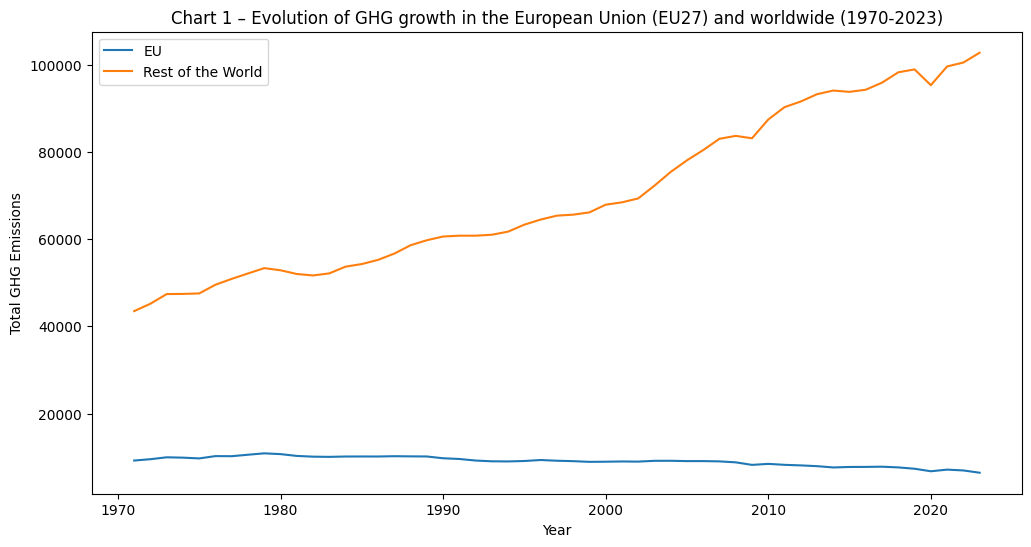

<Figure size 640x480 with 0 Axes>

In [304]:
# Filter data for EU and the rest of the world
eu_data = ghg_totals_by_country[ghg_totals_by_country['Continent'] == 'EU']
world_data = ghg_totals_by_country[ghg_totals_by_country['Continent'] != 'EU']

# Aggregate total emissions for each year for both groups
eu_emissions = eu_data.iloc[:, 4:-1].sum()  # Select columns from 1970 to 2023
world_emissions = world_data.iloc[:, 4:-1].sum()

# Create the plot
plt.figure(figsize=(12, 6))  # Adjust figure size if needed

plt.plot(eu_emissions.index, eu_emissions.values, label='EU')
plt.plot(world_emissions.index, world_emissions.values, label='Rest of the World')

plt.title('Chart 1 – Evolution of GHG growth in the European Union (EU27) and worldwide (1970-2023)')
plt.xlabel('Year')
plt.ylabel('Total GHG Emissions')
plt.legend()
#plt.grid(True)

plt.show()

plt.savefig('chart1.png')

# Chart 2 – Comparison of countries’ GHG emissions per capita aggregated according to the World Bank income groups;

In [282]:
ghg_per_capita_by_country.head()

,EDGAR Country Code,Country,1970,1971,1972,1973,1974,1975,1976,1977,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Continent
0,ABW,Aruba,0.621591,0.698825,0.875514,0.952142,0.935603,1.166287,1.151959,1.335586,...,4.705631,4.908697,4.713297,4.689429,5.553807,4.529961,4.964500,4.986945,5.199052,America
1,AFG,Afghanistan,1.387497,1.345625,1.136047,1.158556,1.231819,1.258354,1.241663,1.231162,...,0.812424,0.768525,0.779393,0.757517,0.725168,0.700207,0.710363,0.719308,0.724742,Asia
2,AGO,Angola,2.803674,2.723448,3.024597,3.162829,3.168898,2.931294,2.352391,2.859557,...,2.935287,2.737463,2.465213,2.258536,2.199314,1.878921,1.900307,1.920968,1.874900,Africa
3,AIA,Anguilla,0.523981,0.526423,0.543562,0.520344,0.560073,0.598576,0.575509,0.592212,...,2.144561,2.149043,2.178249,2.099982,2.039524,1.703662,1.681618,1.671227,1.638172,America
4,ALB,Albania,3.824444,3.710615,4.039683,3.723085,3.754264,3.746380,3.913496,4.051386,...,2.989698,2.855613,3.127462,3.119193,2.933062,2.708112,2.851648,2.650839,2.603893,NaN


In [283]:
ghg_per_capita_by_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 57 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EDGAR Country Code  210 non-null    object 
 1   Country             210 non-null    object 
 2   1970                210 non-null    float64
 3   1971                210 non-null    float64
 4   1972                210 non-null    float64
 5   1973                210 non-null    float64
 6   1974                210 non-null    float64
 7   1975                210 non-null    float64
 8   1976                210 non-null    float64
 9   1977                210 non-null    float64
 10  1978                210 non-null    float64
 11  1979                210 non-null    float64
 12  1980                210 non-null    float64
 13  1981                210 non-null    float64
 14  1982                210 non-null    float64
 15  1983                210 non-null    float64
 16  1984    

In [286]:
# Move 'Continent' to the third position
ghg_per_capita_by_country.insert(1, 'Continent', ghg_per_capita_by_country.pop('Continent'))
ghg_per_capita_by_country.head()



,EDGAR Country Code,Continent,Country,1970,1971,1972,1973,1974,1975,1976,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Total Emissions
0,PLW,Oceania,Palau,188.715088,185.913289,182.806180,179.868477,177.648316,176.480149,176.391481,...,58.893259,55.858824,57.791687,58.608811,59.760289,59.539308,63.169631,63.571857,65.289254,6911.849455
1,QAT,Asia,Qatar,214.940085,227.450998,245.971557,256.399265,204.536495,177.284559,167.716853,...,56.270306,54.449616,52.843239,52.068849,51.937350,50.200318,50.397613,50.005153,52.565055,4807.244795
2,FLK,America,Falkland Islands,77.832143,79.343889,79.034596,76.190592,76.982271,79.975365,80.476531,...,56.696944,57.054336,56.454883,56.740543,57.716499,56.311175,56.769632,56.854747,57.463780,3589.978774
3,BHR,Asia,Bahrain,86.507284,84.212779,84.695924,86.394846,88.171040,74.821341,73.568304,...,43.015191,41.569238,39.581578,37.739648,38.476385,37.216296,36.346191,35.095717,35.251029,3012.030453
4,ARE,Asia,United Arab Emirates,126.395533,128.444163,118.626687,127.599030,110.750021,95.740541,99.445728,...,27.745375,28.263682,27.033301,25.002410,25.985158,25.407053,25.859402,26.601027,26.290684,2587.163052


In [287]:
# Calculate the sum of emissions for each country across all years
ghg_per_capita_by_country['Total Emissions'] = ghg_per_capita_by_country.iloc[:, 3:-1].sum(axis=1) # Changed from 4: to 3:-1

# Sort by 'Total Emissions' in descending order
ghg_per_capita_by_country = ghg_per_capita_by_country.sort_values(by=['Total Emissions'], ascending=False).reset_index(drop=True)
#ghg_per_capita_by_country.iloc[1:].head()
ghg_per_capita_by_country.head()


,EDGAR Country Code,Continent,Country,1970,1971,1972,1973,1974,1975,1976,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Total Emissions
0,PLW,Oceania,Palau,188.715088,185.913289,182.806180,179.868477,177.648316,176.480149,176.391481,...,58.893259,55.858824,57.791687,58.608811,59.760289,59.539308,63.169631,63.571857,65.289254,6977.138708
1,QAT,Asia,Qatar,214.940085,227.450998,245.971557,256.399265,204.536495,177.284559,167.716853,...,56.270306,54.449616,52.843239,52.068849,51.937350,50.200318,50.397613,50.005153,52.565055,4859.809850
2,FLK,America,Falkland Islands,77.832143,79.343889,79.034596,76.190592,76.982271,79.975365,80.476531,...,56.696944,57.054336,56.454883,56.740543,57.716499,56.311175,56.769632,56.854747,57.463780,3647.442554
3,BHR,Asia,Bahrain,86.507284,84.212779,84.695924,86.394846,88.171040,74.821341,73.568304,...,43.015191,41.569238,39.581578,37.739648,38.476385,37.216296,36.346191,35.095717,35.251029,3047.281482
4,ARE,Asia,United Arab Emirates,126.395533,128.444163,118.626687,127.599030,110.750021,95.740541,99.445728,...,27.745375,28.263682,27.033301,25.002410,25.985158,25.407053,25.859402,26.601027,26.290684,2613.453736


In [288]:
# Select the top 20 countries
#top_50_countries = ghg_per_capita_by_country.iloc[1:].head(50)#.reset_index(drop=True)
top_100_countries = ghg_per_capita_by_country.head(100)#.reset_index(drop=True)
#top_50_countries

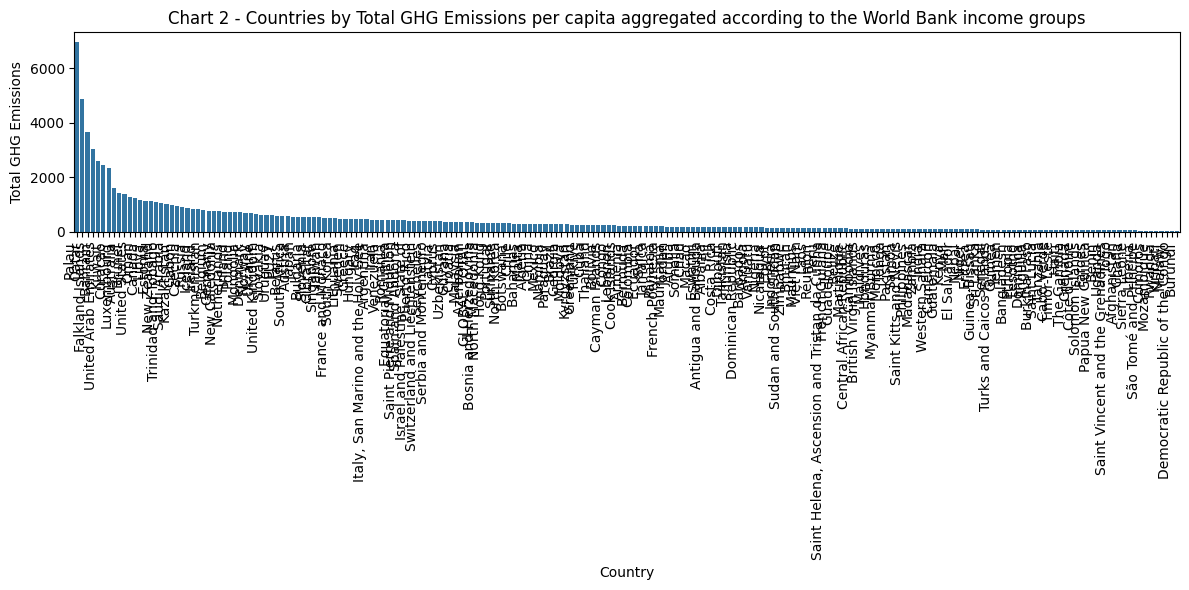

<Figure size 640x480 with 0 Axes>

In [305]:
# Create the bar plot using seaborn
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.barplot(x='Country', y='Total Emissions', data=ghg_per_capita_by_country) # top_100_countries # ghg_per_capita_by_country
plt.title('Chart 2 - Countries by Total GHG Emissions per capita aggregated according to the World Bank income groups')
#plt.title('Comparison of countries’ GHG emissions per capita aggregated according to the World Bank income groups')
plt.xlabel('Country')
plt.ylabel('Total GHG Emissions')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
#plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

plt.savefig('chart2.png')

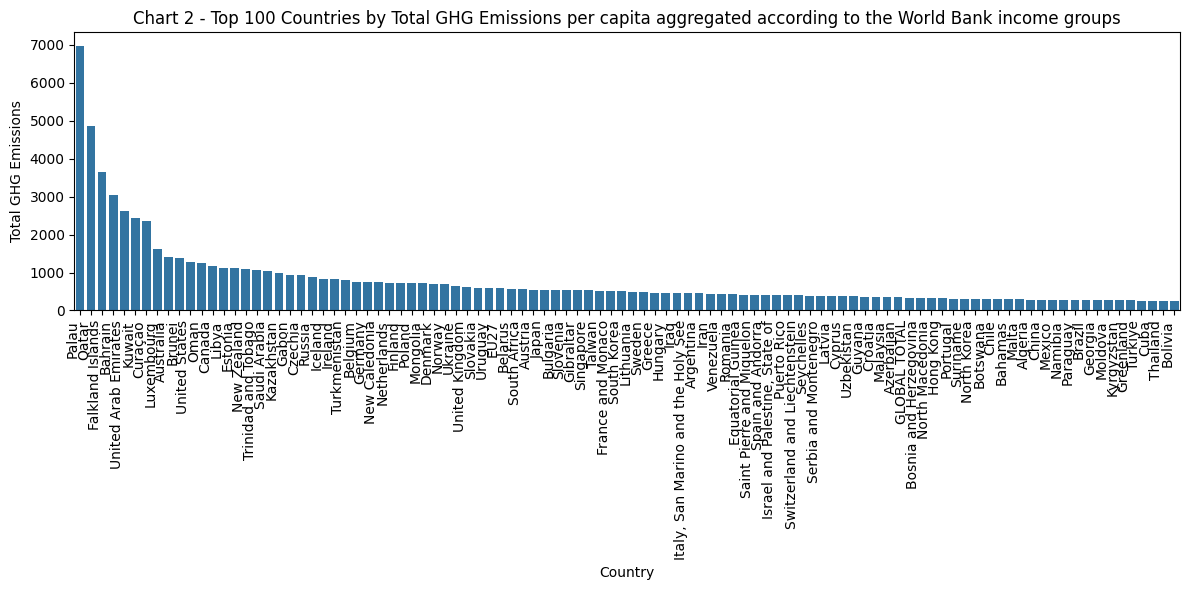

<Figure size 640x480 with 0 Axes>

In [306]:
# Create the bar plot using seaborn
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.barplot(x='Country', y='Total Emissions', data=top_100_countries) # top_100_countries # ghg_per_capita_by_country
plt.title('Chart 2 - Top 100 Countries by Total GHG Emissions per capita aggregated according to the World Bank income groups')
#plt.title('Comparison of countries’ GHG emissions per capita aggregated according to the World Bank income groups')
plt.xlabel('Country')
plt.ylabel('Total GHG Emissions')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
#plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

plt.savefig('chart2_100.png')

# Chart 3 – Contribution of individual country and continent GHG emissions to total world GHG emissions.

In [291]:
ghg_totals_by_country.head()

,EDGAR Country Code,Continent,Country,1970,1971,1972,1973,1974,1975,1976,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,ABW,America,Aruba,0.036713,0.041538,0.052391,0.057360,0.056630,0.070743,0.069793,...,0.469468,0.490990,0.514539,0.496141,0.495532,0.588998,0.482160,0.531202,0.533603,0.561498
1,AFG,Asia,Afghanistan,15.437430,15.364077,13.316628,13.934875,15.177862,15.843058,15.943325,...,27.420132,27.408332,26.633999,27.691927,27.553282,26.982777,26.646320,27.643074,28.614071,29.460052
2,AGO,Africa,Angola,18.998763,18.866057,21.459002,23.018941,23.685423,22.519608,18.586243,...,77.295699,81.775031,78.875889,73.424409,69.504638,69.910832,61.680081,64.408994,67.210842,67.700756
3,AIA,America,Anguilla,0.003355,0.003396,0.003534,0.003411,0.003694,0.003968,0.003833,...,0.031210,0.031334,0.031728,0.032476,0.031594,0.030948,0.026037,0.025224,0.025068,0.026211
4,AIR,Others,International Aviation,172.478021,172.465452,182.459819,190.296910,183.162104,177.165836,177.483077,...,514.263976,543.354255,567.631287,597.771580,624.135612,633.464502,302.632337,335.728729,416.953422,498.178114


In [292]:
# Calculate the sum of emissions for each country across all years
ghg_totals_by_country['Total Emissions'] = ghg_totals_by_country.iloc[:, 3:-1].sum(axis=1) # Changed from 4: to 3:-1

# Sort by 'Total Emissions' in descending order
ghg_totals_by_country = ghg_totals_by_country.sort_values(by=['Total Emissions'], ascending=False).reset_index(drop=True)
ghg_totals_by_country.head() #ghg_totals_by_country.iloc[1:].head()

,EDGAR Country Code,Continent,Country,1970,1971,1972,1973,1974,1975,1976,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Total Emissions
0,GLOBAL TOTAL,Others,GLOBAL TOTAL,24002.751737,24048.408217,24971.278726,26185.418698,26182.148420,26194.503677,27323.858863,...,48808.767176,49058.441256,49878.733809,51026.627449,51278.347920,49327.538885,51568.250032,51968.471601,52962.900859,1.946073e+06
1,CHN,Asia,China,2035.096635,2088.110850,2163.698119,2205.664824,2227.915357,2409.980601,2470.751466,...,13118.895552,13105.715333,13362.318184,13955.693169,14275.531317,14497.898717,15175.619087,15159.641990,15943.986553,3.543848e+05
2,USA,America,United States,5788.649393,5661.560738,5930.782898,6128.985919,5949.054788,5729.884695,6043.495268,...,6328.997918,6206.284817,6151.772377,6337.399699,6212.456748,5671.604437,5997.650745,6046.215739,5960.804380,3.363885e+05
3,EU27,EU,EU27,4591.422704,4615.906263,4767.686556,4986.348683,4946.211218,4858.723738,5122.759438,...,3879.728839,3889.377080,3912.269335,3830.658886,3678.016394,3388.278789,3577.018019,3482.310460,3221.794615,2.416932e+05
4,RUS,NaN,Russia,1723.159417,1737.947395,1821.025956,1922.638804,2014.070194,2112.206018,2188.411269,...,2257.637100,2246.939909,2298.191711,2401.494236,2482.834013,2395.615606,2547.955356,2621.518017,2672.039437,1.232269e+05


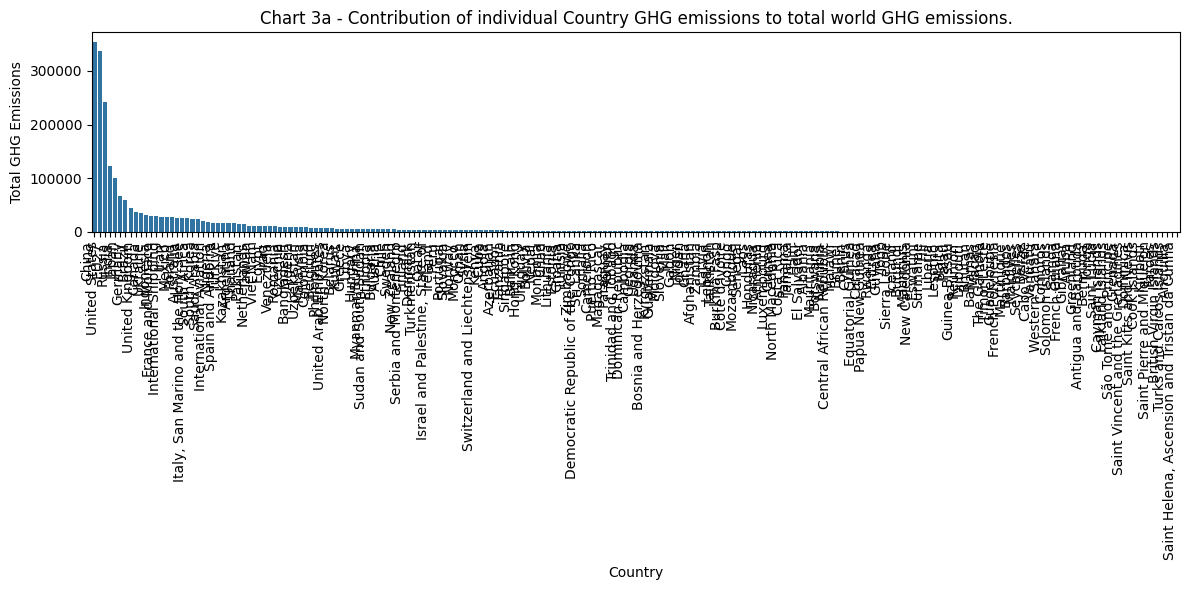

<Figure size 640x480 with 0 Axes>

In [307]:
# Create the bar plot using seaborn
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.barplot(x='Country', y='Total Emissions', data=ghg_totals_by_country.iloc[1:]) # top_100_countries # ghg_per_capita_by_country
plt.title('Chart 3a - Contribution of individual Country GHG emissions to total world GHG emissions.')
#plt.title('Comparison of countries’ GHG emissions per capita aggregated according to the World Bank income groups')
plt.xlabel('Country')
plt.ylabel('Total GHG Emissions')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
#plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

plt.savefig('chart3a.png')

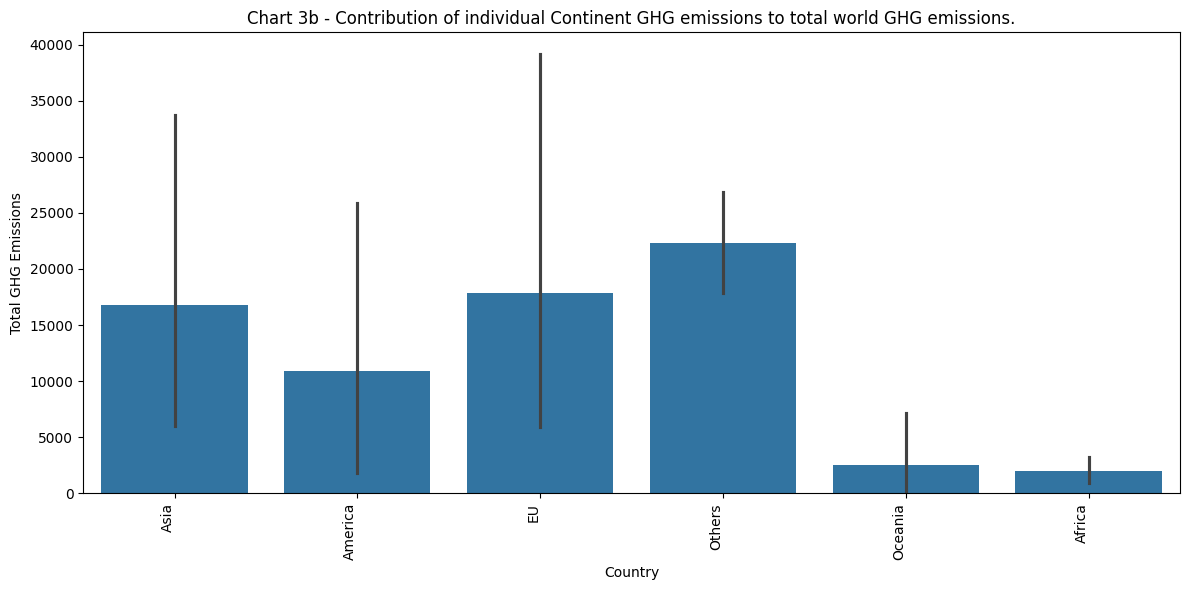

<Figure size 640x480 with 0 Axes>

In [308]:
# Create the bar plot using seaborn
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.barplot(x='Continent', y='Total Emissions', data=ghg_totals_by_country.iloc[1:]) # top_100_countries # ghg_per_capita_by_country
plt.title('Chart 3b - Contribution of individual Continent GHG emissions to total world GHG emissions.')
#plt.title('Comparison of countries’ GHG emissions per capita aggregated according to the World Bank income groups')
plt.xlabel('Country')
plt.ylabel('Total GHG Emissions')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
#plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

plt.savefig('chart3b.png')

In [301]:
top_50_countries = ghg_totals_by_country.head(50)#.reset_index(drop=True)

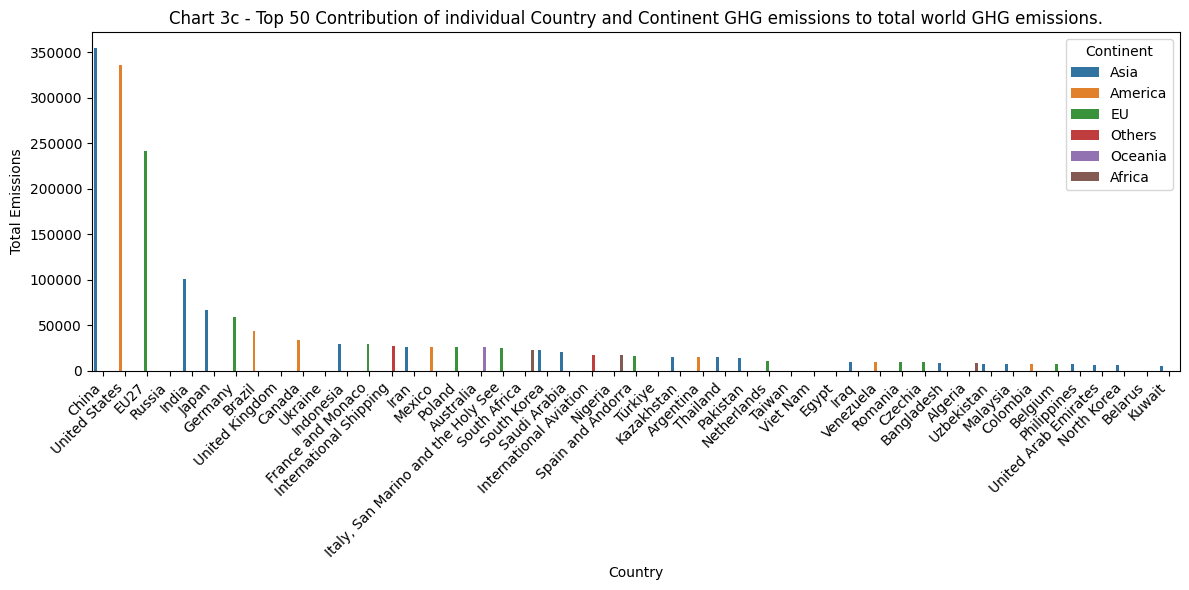

<Figure size 640x480 with 0 Axes>

In [309]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Total Emissions', hue='Continent', data=top_50_countries.iloc[1:])
plt.title('Chart 3c - Top 50 Contribution of individual Country and Continent GHG emissions to total world GHG emissions.')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.savefig('chart3c.png')